In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("history_data_rewards.csv")

In [3]:
data

,Unnamed: 0,Timestamp,Block Reward,Fee Reward,Number of Transactions,market-price,hash-rate,TH/USD Value,Total Miners Rewards USD,sum Reward
0,0,2020-06-19,631.25,38.236424,247066.0,9380.03,1.114223e+08,0.056360,6.279803e+06,669.486424
1,1,2020-06-18,768.75,44.082697,280603.0,9410.94,1.097398e+08,0.069706,7.649520e+06,812.832697
2,2,2020-06-17,862.50,47.792641,333547.0,9427.12,1.080573e+08,0.079416,8.581438e+06,910.292641
3,3,2020-06-16,937.50,50.597425,340517.0,9426.70,1.063748e+08,0.087563,9.314498e+06,988.097425
4,4,2020-06-15,862.50,34.183159,294468.0,9413.47,1.068689e+08,0.078984,8.440900e+06,896.683159
...,...,...,...,...,...,...,...,...,...,...
3588,3588,2010-08-23,10650.00,0.000000,369.0,0.07,5.444246e-03,136933.570548,7.455000e+02,10650.000000
3589,3589,2010-08-22,10600.00,0.000000,366.0,0.07,5.520567e-03,134406.486848,7.420000e+02,10600.000000
3590,3590,2010-08-21,8650.00,0.000000,342.0,0.07,5.096560e-03,118805.620886,6.055000e+02,8650.000000
3591,3591,2010-08-20,9650.00,0.000000,423.0,0.07,4.672554e-03,144567.631982,6.755000e+02,9650.000000


In [4]:
import seaborn as sns

In [5]:
data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)


# Concluimos que:
 - - -
## BLock Reward:
   - Hay correlacion negativa con el numero de transacciones.
     La explicacion a esto es respecto al tiempo ya que a medida que el 
     block reward disminuye en el tiempo y el numero de transacciones aumenta.            
    Satoshi dijo una vez: ***en algunos años veremos una gran cantidad de transaciones
    de bitcoin o no***. Aunque woww su prediccion simplemente se basa en funcionara o no. 50 y 50
    y Funciona!.
    
    - Correlacion negativa entre el block reward y el market price. 
      a medida que el block reward disminuye tiende aumentar el precio
      del BTC, es logico debido a la desflacion pero (-0.57) pensaba un 
      numero mas cercano al -1
_________________________________________________

## Fee reward:
- A medida que block reward disminuye en el tiempo.
    El fee reward aumenta!
    Intentando compensar la escacez que genera el Block Reward.En un futuro de 10 años,
    la mineria dependera totalmente de el Fee Reward 
- Correlacion baja entre el numero de transaccion y el fee reward, me esperaba
    una correlacion mas notoria ya que a mayor cantidad de transacciones 
    mayor recaudacion del Fee Reward
_________________________________________________

## Number of Transaction:
- Correlacion entre el precio y market price!
    Un buen indicador!
    Si eres Trader, deberias tomar en cuenta el numero de Transacciones para entender la tendencia del mercado
_________________________________________________

## TH/USD Value:
- Correlacion baja con el block reward
- No hay correlacion entre fe reward
-no hay correlacion alguna entre el precio del BTC y el valor del TH
   En conclucion el valor del TH muestra solo dependencia del Block Reward y no es notorio. Aunque concluimos que 
   al paso del tiempo el valor TH se ira depreciando, es decir debemos aumentar nuestro computo cada vez mas y mas.
_________________________________________________



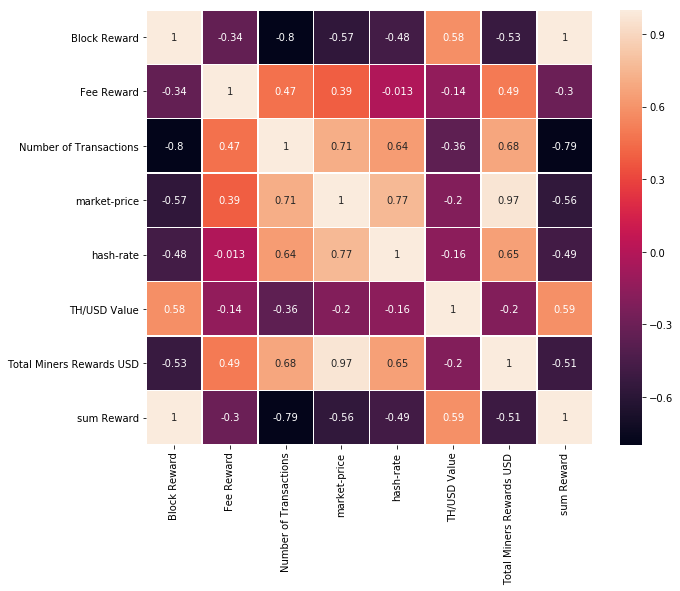

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True,linewidths=.5)

In [7]:
data["Timestamp"]=pd.to_datetime(data["Timestamp"])

In [8]:
data_model=pd.read_csv("../blockchain data\models_prices_th.csv")

In [9]:
data_model

,Models,Price,Power Consumtion,TH/s
0,Antminer S19 Pro 110TH/s,2407.0,3250,110
1,Antminer S19 - 95TH/s,1785.0,3250,95
2,Antminer T17+ 58TH/s,817.0,2900,58
3,Antminer T19 - 84TH/s,1749.0,3150,84
4,Antminer S17e-60TH/s,799.0,2700,60
5,Antminer S17+ 70TH/s,1232.0,2800,70
6,Antminer S9 SE-16TH/s,95.0,1280,16
7,Antminer S9k-13.5TH/s,63.0,1148,14
8,INNOSILICON T2T-29T,499.0,2200,29


In [69]:
def time_model(data,data_model):
    fig, ax = plt.subplots()
    fig.set_size_inches(18.5, 10.5)
    ax.grid()
    ax.set(xlabel='Date Time', ylabel='Profitability',
       title='Profitability of new Asics models')
    for i in range(len(data_model)):
        data_temp=data[data["Timestamp"]>pd.to_datetime(data_model["time"][i])]
        data_temp[['Timestamp','market-price','TH/USD Value']]
        data_temp["Profit"]=(data_temp["market-price"]*data_temp["TH/USD Value"]*data_model["TH/s"][i])/data_model["Price"][i]
        ax.plot(data_temp["Timestamp"],data_temp["Profit"],label=data_model['Models '][i])
        ax.legend(loc="upper right", frameon=False)

    # ax.plot()   
    plt.show()

In [15]:
data_model

,Models,Price,Power Consumtion,TH/s,time
0,Antminer S19 Pro 110TH/s,2407.0,3250,110,2020-03-24
1,Antminer S19 - 95TH/s,1785.0,3250,95,2020-03-24
2,Antminer T17+ 58TH/s,817.0,2900,58,2019-12-01
3,Antminer T19 - 84TH/s,1749.0,3150,84,2020-06-01
4,Antminer S17e-60TH/s,799.0,2700,60,2019-04-01
5,Antminer S17+ 70TH/s,1232.0,2800,70,2019-04-01
6,Antminer S9 SE-16TH/s,95.0,1280,16,2020-06-01
7,Antminer S9k-13.5TH/s,63.0,1148,14,2020-06-01
8,INNOSILICON T2T-29T,499.0,2200,29,2019-08-19


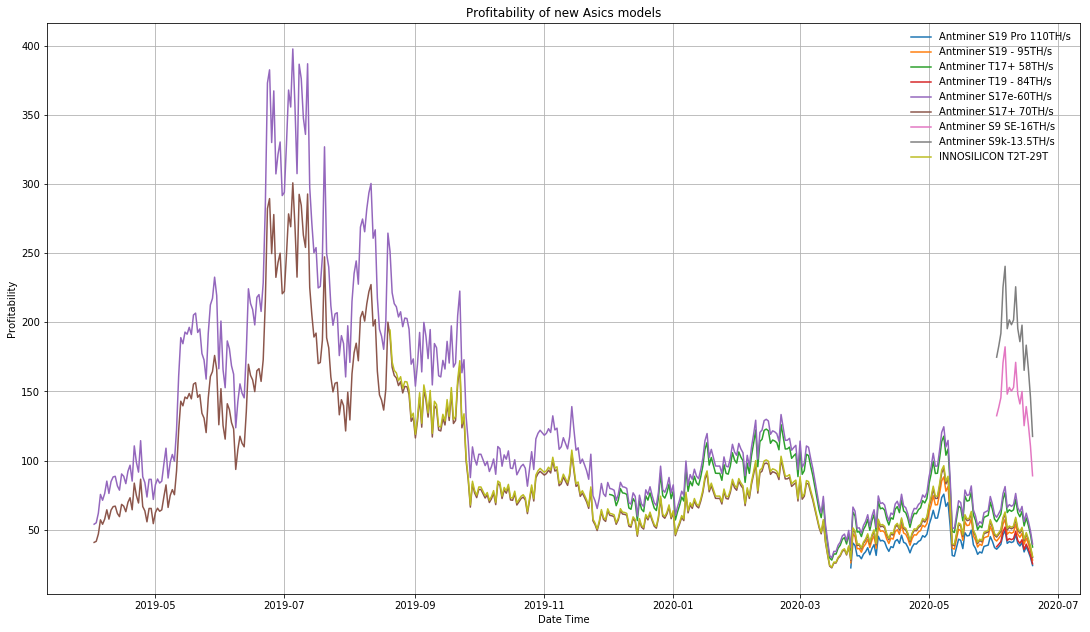

In [70]:
time_model(data,data_model)

observacion:
Esta grafica muestra la rentabilidad de la maquina vs costo. No estamos deduciendo el costo de energia, ya que cada pais difiere de su tarifa: para saber el costo vs precio puedes chequear en la base de datos ya creada : escribe esta.

- El precio de la S19 esta especulado, ya que su rentabilidad acutal no estan potente como otras unidades, por ejemplo: S9-Se o S9K, pero como dijimos anteriormente el costo de electricidad es una variable muy importante 

- Si quieres ahorrar dinero? mejor compra una INNosilicon que una S17+, como veras su profit son muy parecidos y te ahorras mucho. 

- La ganadora es la S17e, T17+, son las unidades mas rentables y estables para recuperar tu inversion cuanto antes. 

In [35]:
data_model.to_csv("../blockchain data\models_prices_th.csv")

In [36]:
data_used=pd.read_csv("../blockchain data\model_used.csv")

In [43]:
data_used=data_used.rename(columns={"TH":'TH/s',"Models":"Models "})

In [45]:
data_used

,Models,Price,TH/s,time
0,S9 Used,140,14,2020-05-01
1,T9+,100,10,2020-05-01
2,"Avalon, Without Control board",180,20,2020-05-01
3,Innosilicon 30T,360,30,2020-05-01
4,S17,500,45,2020-05-01
5,S11,280,20,2020-05-01


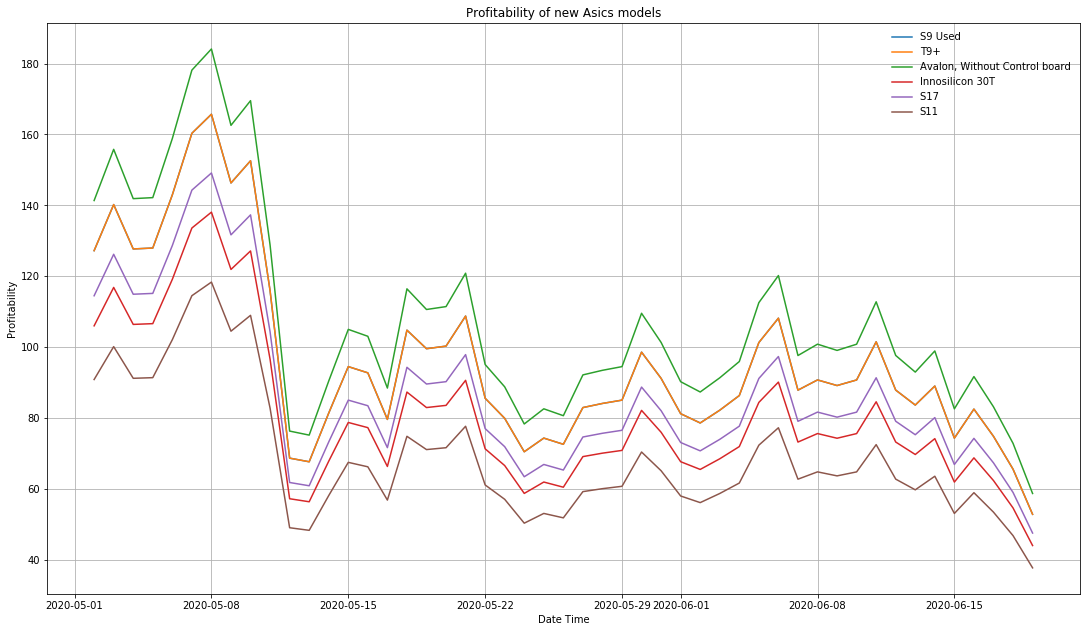

In [71]:
time_model(data,data_used)

Observacion:
- Los precios estipulados son una media de cada uno. El mercado es grande y la competencia en venta es reñida. Muchos desilucionados otros quieren cambiar a un modelo mas nuevo ó en el pais donde se encuentran ya no es muy rentable.

- No hay mucho que deducir vista que los precios estan calculados base a su rendimiento en TH/s

In [57]:
data_sum=pd.concat([data_model,data_used],ignore_index=True)


In [58]:
data_sum

,Models,Price,Power Consumtion,TH/s,time
0,Antminer S19 Pro 110TH/s,2407.0,3250.0,110,2020-03-24
1,Antminer S19 - 95TH/s,1785.0,3250.0,95,2020-03-24
2,Antminer T17+ 58TH/s,817.0,2900.0,58,2019-12-01
3,Antminer T19 - 84TH/s,1749.0,3150.0,84,2020-06-01
4,Antminer S17e-60TH/s,799.0,2700.0,60,2019-04-01
5,Antminer S17+ 70TH/s,1232.0,2800.0,70,2019-04-01
6,Antminer S9 SE-16TH/s,95.0,1280.0,16,2020-06-01
7,Antminer S9k-13.5TH/s,63.0,1148.0,14,2020-06-01
8,INNOSILICON T2T-29T,499.0,2200.0,29,2019-08-19
9,S9 Used,140.0,NaN,14,2020-05-01


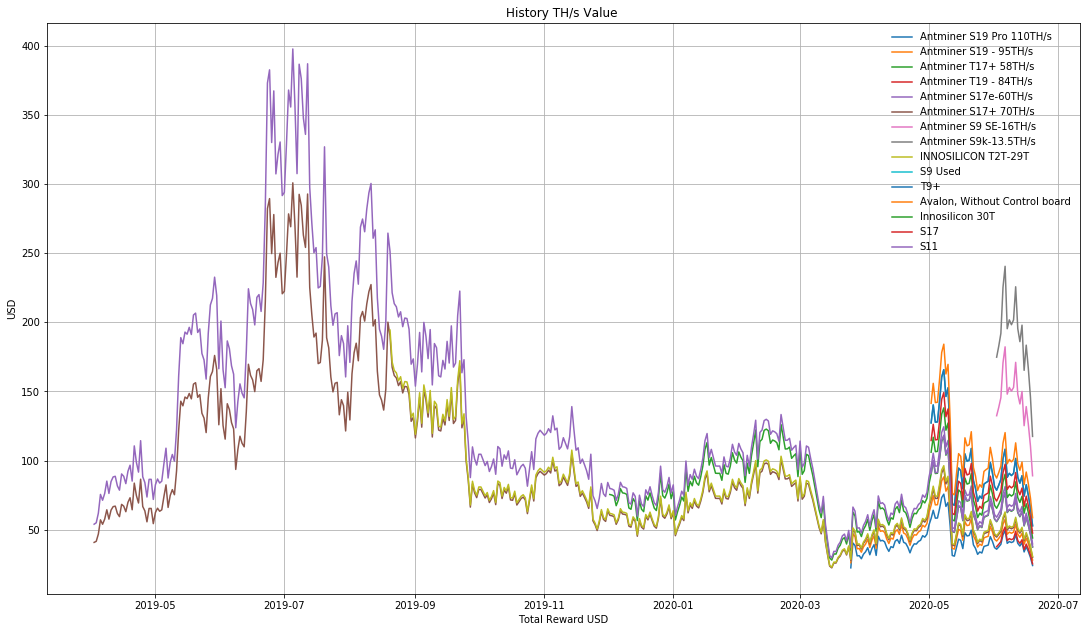

In [59]:
time_model(data,data_sum)

Conclucion:

Analizando los resultados finales tenemos que:

### TH/s Value y su futuro

- EL TH/s Value tiene correlacion con el block reward y el precio del mercado, pero a medida que pasa el tiempo, quizas despues del siguiente Halving, el impuesto de cada bloque tendra una alta correlacion junto con el precio del mercado. El valor del TH/s continuara disminuyendo lentamente hasta que dependa totalmente del precio y el impuesto de cada bloque. Pero, no quiere que no tienda a subir más, todo lo contrario. El precio del Bitcoin tiene una fuerte tendencia a su alza, el cual arrastrara de manera significativa el valor del TH/s, mi criterio "El valor del TH/s en estos momentos esta devaluado", solo toca esperar que sucederá.

## Brecha entre el costo Electrico vs La rentabilidad de la mineria  

- Solo unos cuantos paises puede ser rentable la mineria, aunque estos valores fueron Scrappeados en Internet. Estos precios es respecto al consumo electrico en general y no de contratos personalizados o contratos de distribuicion de gas para alimentar grandes generadores electricos obteniendo un costo competitivo.

Un indicador de esto es el continuo incremento del Hash-Rate en el ecocistema del blockchain. Si llegase al punto donde el coste electrico supera al profit de las Asics sera mas rentable solo comprar Bitcoins que Minar, creando un desenso del Hash-Rate donde los paises con electricidad economica o subsidada seran los beneficiados en cierto punto ya que el Valos del TH/s se incrementara de manera notoria 

## De lo artesanal a lo industrial

Muchas de las grandes Ideas, proyectos, emprendimiento empieza de una idea simple para un nicho de mercado y crece de manera exponencial cuando grandes coorporativas apuestan en dicho proyecto conviertiendolo en un sueño hecho realidad, aunque no es para todos. La inversion a gran escala si bien ayuda tambien aplasta a la minoria, a los "artesanales" que tarde o temprano seran obligados apagar sus maquinas y seder el paso a las grandes coorporativas, solo los que esten en paises donde las condiciones de minado son optimas podran de sobrevivir.






## Aportando un pequeño grano de arena

Hace un mes estaba hablando con algunos amigos sobre que tan rentable es la mineria. 

El Blockchain de Bitcoin es el primero y a mi criterio el mas intersante, Scrappie todos los datos del blockchain con la finalidad de facilitar este dataset para todos aquellos curiosos que quieran estudiar mas de cerca el resultado de cada bloque. 

Luego de esto realice varios Scrappeos como: EL costo electrico en casi todos los paises del mundo, Precio de las maquinas actuales en bitmain y otras para detallar su verdadero rendimiento en cuanto ganancia costo.




Intro

¿Es posible generar ingresos con la minería digital sin tener que hacer nada?

Pues si, pero aún, asi es relativo todo depende de tu expectativa y bolsillo.

Desde que Satoshy Nakamoto creó el bitcoin tambien dio inicio a un método que es la minería digital, la cuál funciona para impedir que el sistema sea corrupto, ya que la unica manera de serlo es que una compañía o un grupo de personas tenga el 51% del computo total que los mineros gastan en encontrar hash y obtener su preciada recompensa, generando ingresos a grandes corporativas, como aquellos que se aventuran a comprar una cantidad de equipos y a minar en sus casas, en un determinado espacio, pero no todos pueden minar, también trae sus desventajas, el poder de computo de estas maquinas requiere de potencia eléctrica, el cual en muchos países la minería digital pudiera ser algo descabellado, como por ejemplo en Corea del Sur, que es uno de los países con el costo mas elevado en electricidad o Venezuela donde solo se requieren de centavos para pagar un mes de de electricidad.

¿La minería es rentable ?

Hay muchos factores, por ejemplo la moneda que estes minando, la potencia de minado de tu maquina o granja, y también la manera en que manejas tu finanzas. Todo influye.Tambien consideremos que el margen de profit para algunos es más remunerable que otros en cuanto el gasto de servicio electrico. Lo ue nos lleva hacernos algunas preguntas que responderemos luego de hacer ciertos analisis.

- ¿Cual es el historial de ganancia que han obtenido los mineros en el tiempo?
- ¿Cual es el Valor real de un TH/s y que sucedera en el transcurso del tiempo, existe alguna correlacion o dependencia al precio del mercado o Block-Rewards?
- ¿Cuales son los mejores Paises para Minar Bitcoin?
- Rentabilidad entre el Profit de Varios Modelos VS Costo Electrico Mensual
- Remuneracion de Inversion Precio de maquina VS Profit
- Conclusion
- ¿Que sucedera despues del siguiente Halving?





